# Economie du stockage

In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sn 
%matplotlib inline 
plt.style.use('ggplot')

In [52]:
prices = pd.read_csv('Day-ahead_Prices_FR_2020.csv',sep=";",encoding='utf-8',decimal=',')
prices['Day-ahead Price [EUR/MWh]'] = prices['Day-ahead Price [EUR/MWh]'].str.replace(',','.')

In [53]:
df = prices.iloc[:744].copy() #31*24 = 744

In [54]:
df.head(1)

,MTU (CET),Day-ahead Price [EUR/MWh]
0,01.01.2020 00:00 - 01.01.2020 01:00,41.88


In [55]:
df.tail(2)

,MTU (CET),Day-ahead Price [EUR/MWh]
742,31.01.2020 22:00 - 31.01.2020 23:00,28.74
743,31.01.2020 23:00 - 01.02.2020 00:00,24.12


In [56]:
df['Day-ahead Price [EUR/MWh]'] = pd.to_numeric(df['Day-ahead Price [EUR/MWh]'])

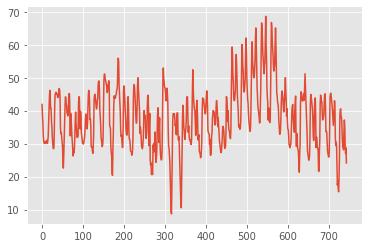

In [59]:
df['Day-ahead Price [EUR/MWh]'].plot()

# Charge & Décharge

Alternance de cycle de charge et de décharge : 
(0,1,0,1)
0 = charge
1 = décharge 

In [60]:
etat = [i%2 for i in range(len(df))]

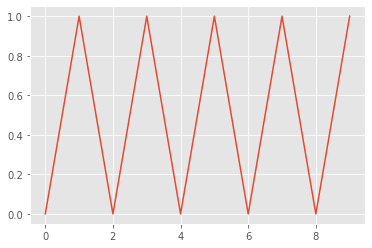

In [66]:
plt.plot(range(10),etat[:10])

In [70]:
df['Day-ahead Price [EUR/MWh]'].tolist()

TypeError: can't multiply sequence by non-int of type 'list'

In [73]:
ventes = [df['Day-ahead Price [EUR/MWh]'][i]*etat[i] for i in range(len(df))]

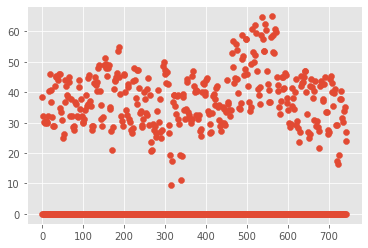

In [78]:
plt.scatter(range(len(ventes)),ventes)

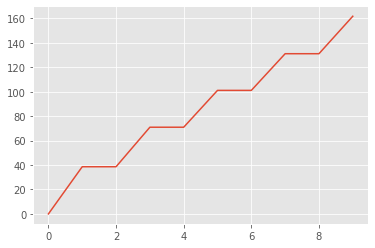

In [83]:
plt.plot(np.cumsum(ventes)[:10])